# 피마족 인디언 당뇨병 발병 유무를 예측하는 이진 분류


*   당뇨병 발생(1), 정상(0)
*   https://www.kaggle.com/uciml/pima-indians-diabetes-database



## 데이터 준비하기

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split

np.random.seed(5)

In [3]:
dataset = pd.read_csv('/content/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## outcome 칼럼(label : y) 비율 확인

In [7]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

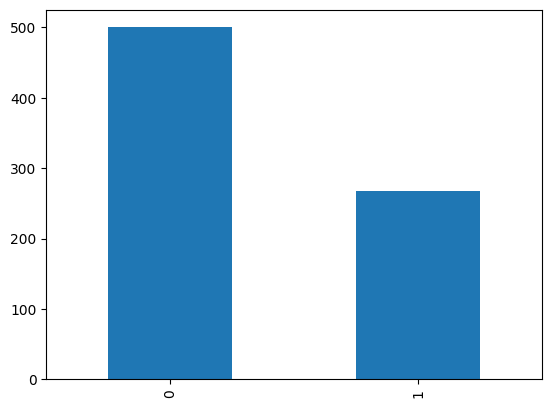

In [9]:
dataset['Outcome'].value_counts().plot.bar();

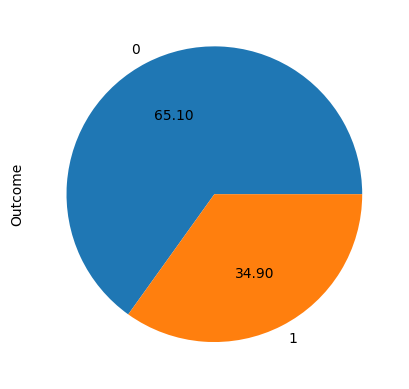

In [10]:
dataset['Outcome'].value_counts().plot.pie(autopct='%.2f');

## 데이터 분리하기

### X, y 데이터 분리하기

In [11]:
dataset.columns # 칼럼 확인

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
y = dataset[dataset.columns[-1]]

In [17]:
X = dataset[dataset.columns[:-1]]

### 훈련셋 / 테스트셋으로 분리

In [18]:
# 훈련셋과 테스트셋 비율 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7, stratify=y)

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

X_train.shape :  (614, 8)
X_test.shape :  (154, 8)


## 모델 구성하기

In [19]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


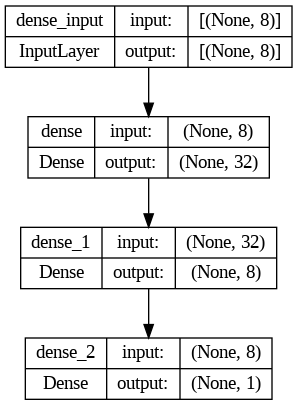

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

## 모델 설정하기

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

## 모델 학습하기

In [24]:
history = model.fit(X_train, y_train, epochs=1500, batch_size=128)

Epoch 1/1500
5/5 [==============================] - 1s 7ms/step - loss: 20.7056 - acc: 0.3485
Epoch 2/1500
5/5 [==============================] - 0s 5ms/step - loss: 15.5975 - acc: 0.3518
Epoch 3/1500
5/5 [==============================] - 0s 4ms/step - loss: 10.2603 - acc: 0.3616
Epoch 4/1500
5/5 [==============================] - 0s 4ms/step - loss: 5.0126 - acc: 0.3876
Epoch 5/1500
5/5 [==============================] - 0s 5ms/step - loss: 3.0226 - acc: 0.5375
Epoch 6/1500
5/5 [==============================] - 0s 5ms/step - loss: 3.3775 - acc: 0.6042
Epoch 7/1500
5/5 [==============================] - 0s 5ms/step - loss: 3.1512 - acc: 0.6238
Epoch 8/1500
5/5 [==============================] - 0s 4ms/step - loss: 2.3636 - acc: 0.6124
Epoch 9/1500
5/5 [==============================] - 0s 6ms/step - loss: 1.8125 - acc: 0.6091
Epoch 10/1500
5/5 [==============================] - 0s 5ms/step - loss: 1.9352 - acc: 0.5733
Epoch 11/1500
5/5 [==============================] - 0s 4ms/step -

## 학습 결과 그려보기

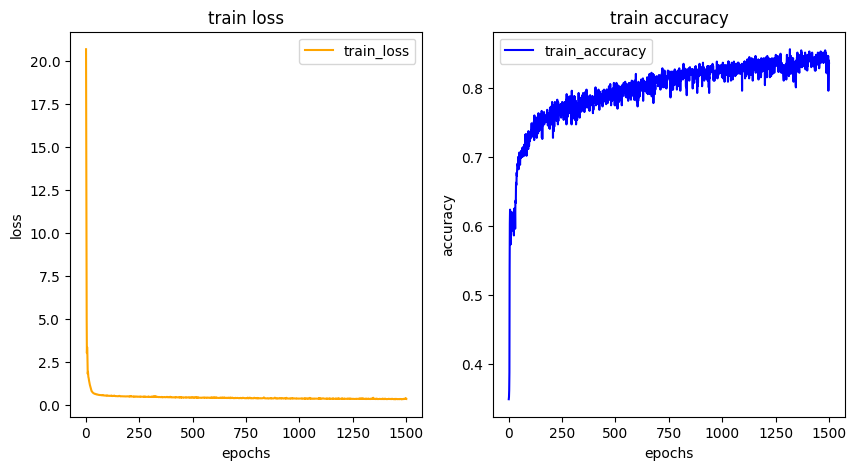

In [25]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

## 모델 평가하기

In [26]:
scores = model.evaluate(X_test, y_test)
print('%s : %.2f%%' % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 5ms/step - loss: 0.5540 - acc: 0.7792
acc : 77.92%


In [27]:
scores # loss, acc

[0.5539751648902893, 0.7792207598686218]

## 성능평가

In [32]:
from sklearn import metrics

y_pred = model.predict(X_test)
preds_1d = y_pred.flatten()
pred_class = np.where(preds_1d > 0.5, 1, 0) # 0.5보다 크면 1, 작으면 0

print('accuracy : ', metrics.accuracy_score(y_test, pred_class))
print('precision : ', metrics.precision_score(y_test, pred_class))
print('recall : ', metrics.recall_score(y_test, pred_class))
print('f1 : ', metrics.f1_score(y_test, pred_class))

5/5 [==============================] - 0s 4ms/step
accuracy :  0.7792207792207793
precision :  0.7083333333333334
recall :  0.6296296296296297
f1 :  0.6666666666666667


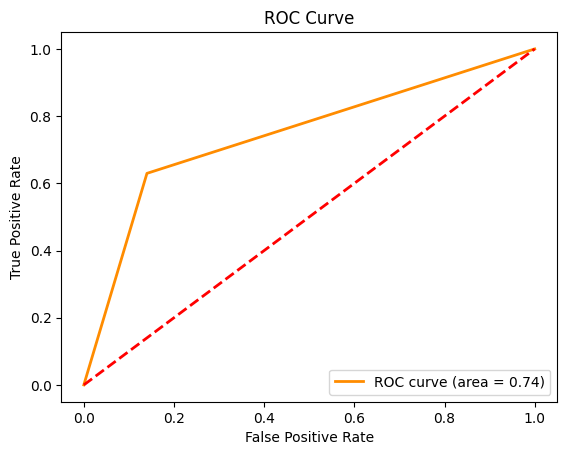

In [33]:
from sklearn.metrics import roc_curve, auc

fpr_A, tpr_A, thr_A = roc_curve(y_test, pred_class)

auc_A = auc(fpr_A, tpr_A)

import matplotlib.pyplot as plt

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


plt.plot(fpr_A, tpr_A, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc_A)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show() # 우수한 모델은 왼쪽에 붙어서 그려짐.